### ✅ Task 1: Import Required Libraries
**What to do:**
Import necessary Python libraries used for data manipulation, visualization, and machine learning.

**Why:**
These libraries will help you handle data (pandas), plot charts (matplotlib), and build models (sklearn).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px

### ✅ Task 2: Upload and Load Dataset
**What to do:**
Upload one of your CSV files containing historical stock data and load it into a DataFrame.

**Why:**
You need real-world stock data to build your regression model.

In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837111,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624594,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161524,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066458,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109695,458707200


### ✅ Task 3: Data Cleaning and Preprocessing
**What to do:**
1. ✅ Convert the `Date` column to **datetime format**.
2. ✅ Remove the **'Adj Close'** column (it’s not needed for prediction).
3. ✅ Ensure the `Volume` column is in **float format**.
4. ✅ Remove any rows that contain **missing (NaN)** values.


**Why:**
Clean data is essential for accurate model training and prediction.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
if 'Adj Close' in df.columns:
    df.drop('Adj Close', axis=1, inplace=True)
df['Volume'] = df['Volume'].astype(float)
df.dropna(inplace=True)
print(df.head())

        Date       Open       High        Low      Close       Volume
0 2013-01-02  19.779285  19.821428  19.343929  19.608213  560518000.0
1 2013-01-03  19.567142  19.631071  19.321428  19.360714  352965200.0
2 2013-01-04  19.177500  19.236786  18.779642  18.821428  594333600.0
3 2013-01-07  18.642857  18.903570  18.400000  18.710714  484156400.0
4 2013-01-08  18.900356  18.996071  18.616072  18.761070  458707200.0


### ✅ Task 4: Visualize Opening Price
**What to do:**
Create a line chart to visualize how the stock’s opening price has changed over time.

**Why:**
Helps you visually understand stock behavior and detect trends or seasonality.

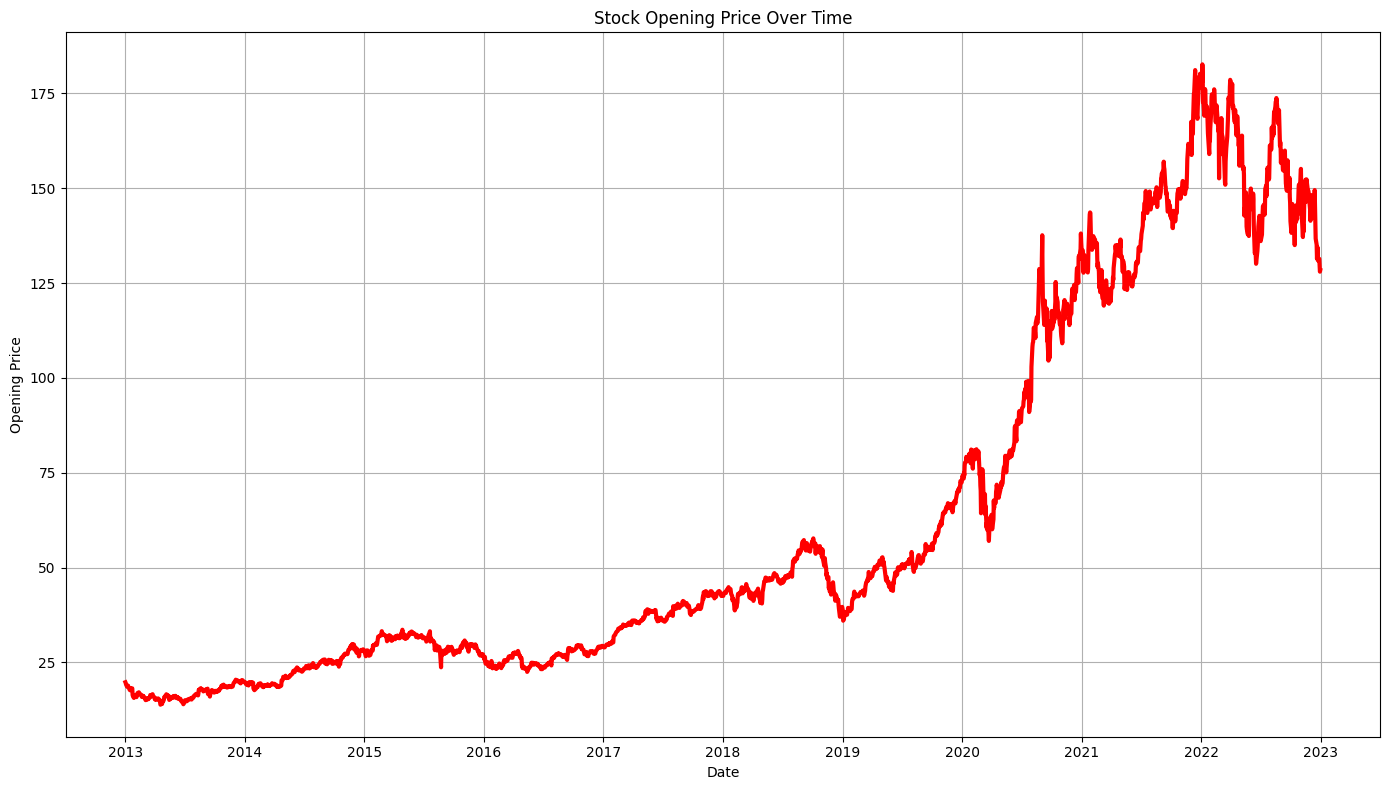

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Open'], color='red', linewidth=3)
plt.title('Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.line(df, x='Date', y='Open', title='Stock Opening Price Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Opening Price')
fig.show()

### ✅ Task 5: Define Features and Target
**What to do:**
Set your feature columns (X) and the target column (y).

**Why:**
This step is necessary to train a machine learning model to predict the Close price.

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
Y = df['Close']


### ✅ Task 6: Split the Dataset
**What to do:**
Split your data into training and testing sets using an 80-20 ratio.

**Why:**
You train the model on one portion of the data and test it on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

### ✅ Task 7: Train the Model
**What to do:**
Train a Linear Regression model using the training data.

**Why:**
This is the core step where your model learns the relationship between features and target.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### ✅ Task 8: Make Predictions
**What to do:**
Use the model to predict the closing prices from the test set.

**Why:**
This step tests the model’s ability to predict new, unseen data.

In [ ]:
y_pred = model.predict(X_test)

### ✅ Task 9: Visualize Actual vs Predicted
**What to do:**
Visualize how close your predictions are to the actual values.

**Why:**
Helps you see if your model is accurate or off-target visually.

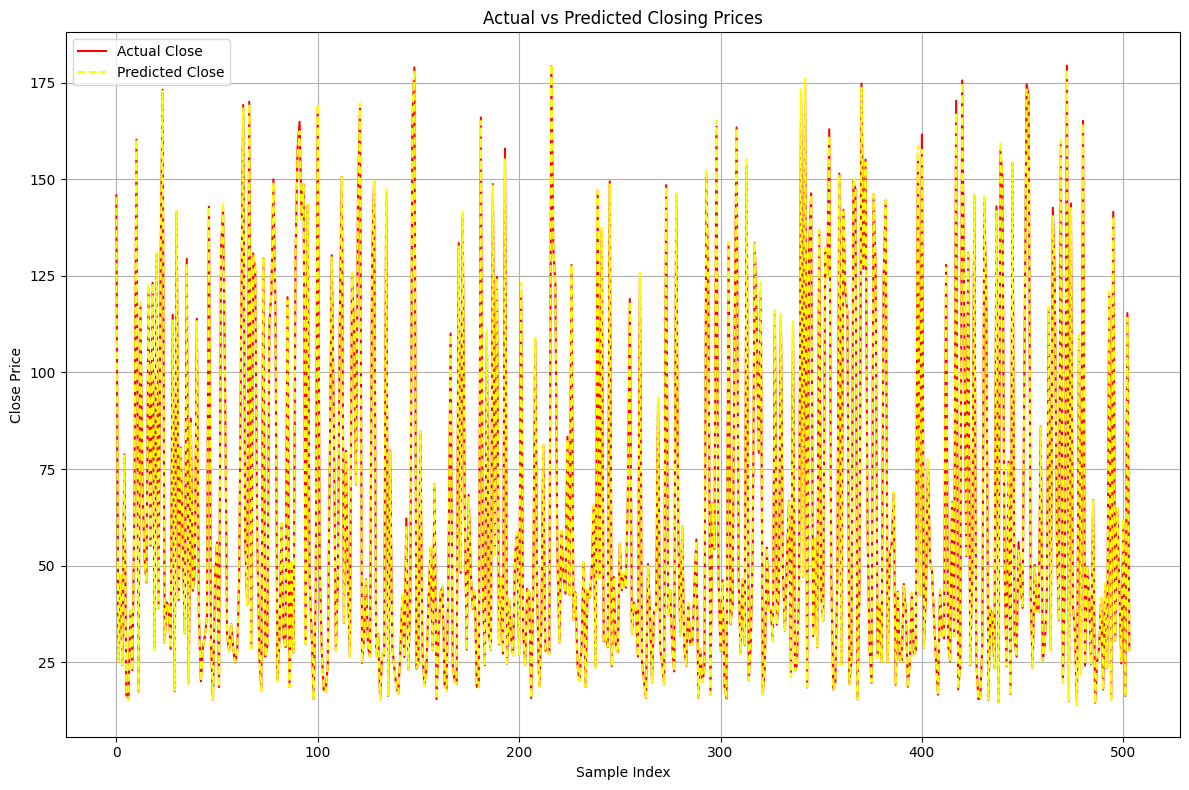

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Actual Close', color='red')
plt.plot(y_pred, label='Predicted Close', color='yellow', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ Task 10: Evaluate the Model
**What to do:**
Evaluate model accuracy using R² score and Mean Squared Error.

**Why:**
Metrics help you determine how well your model performs.

In [ ]:
mean = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mean:.3f}")
print(f"R² Score: {r:.3f}")


Mean Squared Error (MSE): 0.349
R² Score: 1.000


## 📝 Reflection Questions
1. What does your R² score indicate about model performance?
2. Which features influenced the prediction most?
3. How could you improve model accuracy?
4. Would this model be useful for real-time stock trading? Why or why not?